In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy
from tabulate import tabulate


In [15]:
data = pd.read_excel("AMC3_Gruppe_15_WiSE25.xlsx",sheet_name=None)
CMC = data["CMC"]
auheizen = data["Aufheizen"]
reaktionsverlauf = data["Experiment"]

# Berechnen der kritischen Mizellenkonzentration

"Es wurde eine CMC von 1.551 g\cdot L bestimmmt.
Vom Literaturwert weicht dieser um 35.392 % ab
[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.027]
\num[round-precision=4]{[0.18  0.181 0.182 0.183 0.184 0.185 0.186 0.187 0.188 0.189 0.19  0.191
 0.192 0.207]}
\begin{tabular}{rlllll}
\hline
  0 & \num[round-precision=1]{0.0}               & \num[round-precision=4]{0.0}                 & \num[round-precision=4]{180.0} & \num[round-precision=4]{0.0}                & \num[round-precision=4]{1.4}    \\
  1 & \num[round-precision=1]{1.0}               & \num[round-precision=4]{0.11254814814814816} & \num[round-precision=4]{181.0} & \num[round-precision=4]{0.6218129731941887} & \num[round-precision=4]{160.9}  \\
  2 & \num[round-precision=1]{2.0}               & \num[round-precision=4]{0.22509629629629632} & \num[round-precision=4]{182.0} & \num[round-precision=4]{1.236792836792837}  & \num[round-precision=4]{301.0}  \\
  3 & \num[round-precision=1]{3.0}    

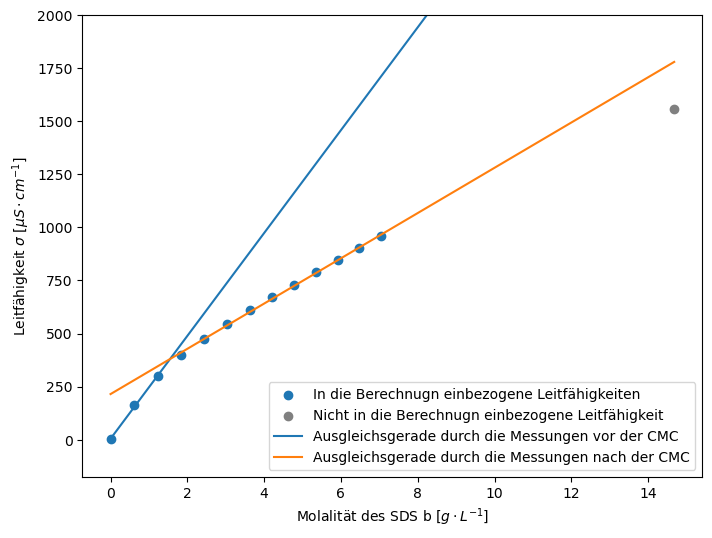

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

# TODO: Hier checken was die actual eingewogenen werte waren
m_SDS = 3.0388  #g
V_SDS = 27e-3 # L
b_SDS = m_SDS/V_SDS # g.L^-1

V_SDS_zugegeben = np.concat([np.arange(0,13),[27]]) * 1e-3 

V_probe = 180e-3 + V_SDS_zugegeben # L
c_SDS = V_SDS_zugegeben*b_SDS / V_probe

CMC_lit = 2.4 # g.L^-1

leitfaehigkeit = CMC["Value"] 
plt.scatter(c_SDS[:-1],leitfaehigkeit[:-1],label="In die Berechnugn einbezogene Leitfähigkeiten")
plt.scatter(c_SDS[-1],list(leitfaehigkeit)[-1],c="grey",label="Nicht in die Berechnugn einbezogene Leitfähigkeit")

ausgleich1 = scipy.stats.linregress(c_SDS[:3],leitfaehigkeit[:3])
ausgleich2 = scipy.stats.linregress(c_SDS[3:-1],leitfaehigkeit[3:-1])
ax.plot(c_SDS, ausgleich1.slope * c_SDS + ausgleich1.intercept,label="Ausgleichsgerade durch die Messungen vor der CMC")
ax.plot(c_SDS, ausgleich2.slope * c_SDS + ausgleich2.intercept,label="Ausgleichsgerade durch die Messungen nach der CMC")
ax.set_ylim(top=2000)
ax.set_xlabel("Molalität des SDS b [$g\cdot L^{-1}$]")
ax.set_ylabel("Leitfähigkeit $\sigma$ [$\mu S\cdot cm^{-1}$]")

def ausgleichs_schnitt(x):
    return (ausgleich1.slope * x + ausgleich1.intercept) - (ausgleich2.slope * x + ausgleich2.intercept)

CMC_gemessen = scipy.optimize.fsolve(ausgleichs_schnitt,2.4)[0]

print(f""""Es wurde eine CMC von {CMC_gemessen:.3f} g\cdot L bestimmmt.
Vom Literaturwert weicht dieser um {100-100*CMC_gemessen/CMC_lit:.3f} % ab""")
fig.savefig("CMC.eps")
print(V_SDS_zugegeben)
ax.legend()
fig.savefig("CMC.pdf")
def l(x):
    return rf"\num[round-precision=4]{{{x}}}"
def l1(x):
        return rf"\num[round-precision=1]{{{x}}}"
print(l(V_probe))
print(tabulate(zip([l1(x) for x in V_SDS_zugegeben*1e3],[l(x) for x in (V_SDS_zugegeben*b_SDS)],[l(x) for x in (V_probe)*1e3], [l(x) for x in (c_SDS)], [l(x) for x in (CMC["Value"])]),tablefmt="latex_raw",showindex="always"))
c_SDS
print([l(x) for x in CMC["Value"]])
print(fr"{ausgleich1.slope} \cdot x + {ausgleich1.intercept} ={ausgleich2.slope} \cdot x + {ausgleich2.intercept}")

# Erstellen eines p-t-Diagrams

0.19223798266351633
\begin{tabular}{rrrlll}
\hline
    &    &     & Volumen der Lösung [mL]                      & Masse der Probe [\unit{\gram}]              & Umsatz                                       \\
\hline
  1 &  2 & 238 & \num[round-precision=3]{0.04100000000000037} & \num[round-precision=3]{4.879000000000044}  & \num[round-precision=3]{0.19223798266351633} \\
  2 &  4 & 236 & \num[round-precision=3]{0.04640000000000022} & \num[round-precision=3]{5.521600000000026}  & \num[round-precision=3]{0.21755713159968582} \\
  3 &  6 & 234 & \num[round-precision=3]{0.07699999999999996} & \num[round-precision=3]{9.162999999999995}  & \num[round-precision=3]{0.36103230890464916} \\
  4 &  8 & 232 & \num[round-precision=3]{0.10740000000000016} & \num[round-precision=3]{12.78060000000002}  & \num[round-precision=3]{0.5035697399527195}  \\
  5 & 10 & 230 & \num[round-precision=3]{0.1396999999999995}  & \num[round-precision=3]{16.62429999999994}  & \num[round-precision=3]{0.6550157604412901

25.38

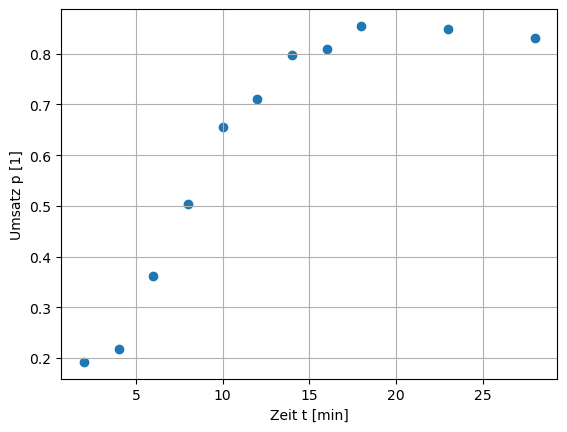

In [22]:
fig, ax = plt.subplots()

dichte_MMA = 0.94 # g/mL
cp_MMA = 1.5 # J/(g⋅K)
cp_wasser = 4.18 # J/(g⋅K)
M_MMA = 100.12 # g/mol

V_MMA = 27 # mL

V_initiator = 5 # ml

m_voll = np.array([
    12.6217,
    12.5602,
    12.5994,
    12.7125,
    12.7088,
    12.6894,
    12.8538,
    12.8370,
    12.7710,
    12.8559,
    12.7192
])
m_leeer = np.array([
    12.5807,
    12.5138,
    12.5224,
    12.6051,
    12.5691,
    12.5378,
    12.6837,
    12.6645,
    12.5887,
    12.6749,
    12.5420
])

m_best = m_voll-m_leeer


m_0 = V_MMA * dichte_MMA


V_wasser = 180
V_initiator=4
V_tensid = 27
V_MMA =27
V_Lsg_0 =(V_MMA+V_tensid+V_initiator+V_wasser)


V_Lsg = V_Lsg_0-2*np.array(list(range(11)))
m_poly  = m_best *V_Lsg_0/2

p = m_poly /m_0 
m_best
ind = np.array([2,4,6,8,10,12,14,16,18,20,25])

t= np.array([2,4,6,8,10,12,14,16,18,23,28])
print(p[0])
ax.scatter(t,p)
ax.set_ylabel("Umsatz p [1]")
ax.set_xlabel("Zeit t [min]")
fig.savefig("pt.pdf")
ax.grid()
header = [r"Volumen der Lösung [mL]", r"Masse der Probe [\unit{\gram}]","Umsatz"]



print(tabulate(zip(ind,V_Lsg,list(map(lambda x: rf"\num[round-precision=3]{{{x}}}",m_best)),list(map(lambda x: rf"\num[round-precision=3]{{{x}}}",m_poly)),list(map(lambda x: rf"\num[round-precision=3]{{{x}}}", p))),headers=header,showindex=list(range(1,12)),tablefmt="latex_raw"))

m_0

# Reaktionsverlauf

[13963. 13964. 13965. ... 16137. 16138. 16139.]
\begin{tabular}{rr}
\hline
   a &       l \\
\hline
   1 & 920.05  \\
   2 & 912.318 \\
   3 & 904.587 \\
   4 & 896.855 \\
   5 & 889.124 \\
   6 & 881.392 \\
   7 & 873.661 \\
   8 & 865.929 \\
   9 & 858.198 \\
  10 & 850.466 \\
  11 & 842.735 \\
\hline
\end{tabular}


[920.05,
 912.318487394958,
 904.5869747899158,
 896.8554621848738,
 889.1239495798319,
 881.3924369747898,
 873.6609243697477,
 865.9294117647058,
 858.1978991596638,
 850.4663865546217,
 842.7348739495797,
 824.1206161137441,
 824.1206161137441,
 824.1206161137441,
 824.1206161137441,
 824.1206161137441,
 824.1206161137441,
 824.1206161137441,
 824.1206161137441]

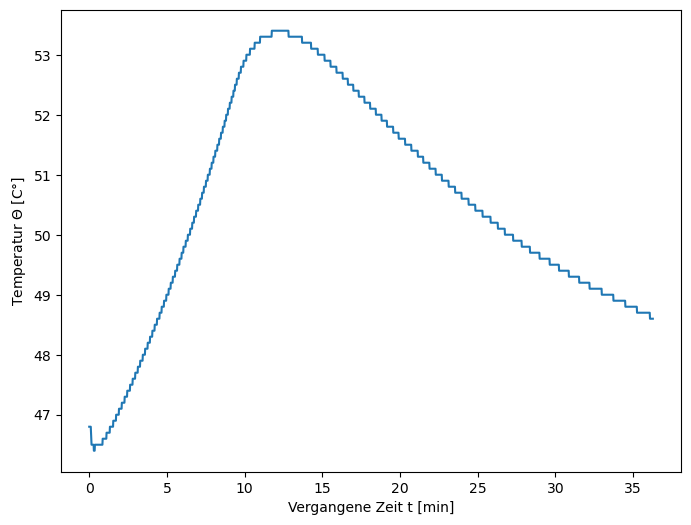

In [23]:
fig,ax = plt.subplots(figsize=(8,6))

T = np.array(reaktionsverlauf["Value2"]) 
dates = []
for datestr in reaktionsverlauf["Date/Time"]:
    date = list(map(lambda x:float(x),datestr.split(" ")[1].split(":")))
    dates.append(date[0]*3600+date[1]*60+date[2])
dates = np.array(dates)

t_s = dates - dates[0]
t_min = t_s/60

print(dates)

ax.plot(t_min,T)
reaktionsverlauf
ax.set_xlabel("Vergangene Zeit t [min]")
ax.set_ylabel("Temperatur $\Theta$ [C°]")
dT = scipy.signal.savgol_filter(T,window_length=60,polyorder=1,deriv=1,delta=1/60)
fig.savefig("T_min.pdf")

m_wasser = 180 + 27 +4
V_mma = 27
dichte_mma =.94
m_mma = V_mma*dichte_mma
cp_mma = 1.5 #J
cp_wasser = 4.18

chunks = [np.array(dT[i:i+120]) for i in range(0, len(t_s), 120)]
cps = []
for i in range(11):
    anteil = ((m_wasser+27-2*i)/(m_wasser+27))
    cps.append(cp_wasser*m_wasser * anteil + cp_mma * m_mma*anteil)
cps.extend(8*[cp_wasser*m_wasser * ((m_wasser-2*11)/m_wasser) + cp_mma * m_mma*((m_wasser-2*11)/m_wasser)])
qchunks = []
for i,c in enumerate(chunks):
    qchunks.append(cps[i]*c)
Q_chem = np.concatenate(qchunks)
print(tabulate(zip(range(1,12),cps),tablefmt="latex",headers="always"))
cps

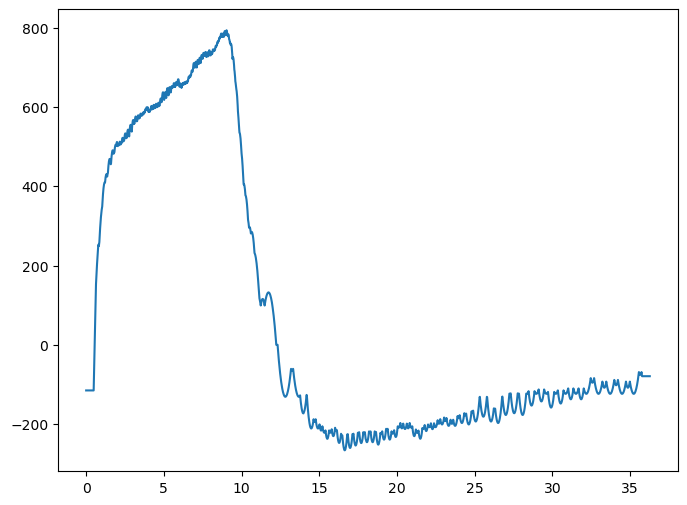

In [24]:
fig,ax = plt.subplots(figsize=(8,6))
ax.plot(t_min,Q_chem, label =r"Änderungsrate der Temperatur")
fig.savefig("QT.pdf")

705 705 2177 [46.8 46.8 46.8 ... 48.6 48.6 48.6]


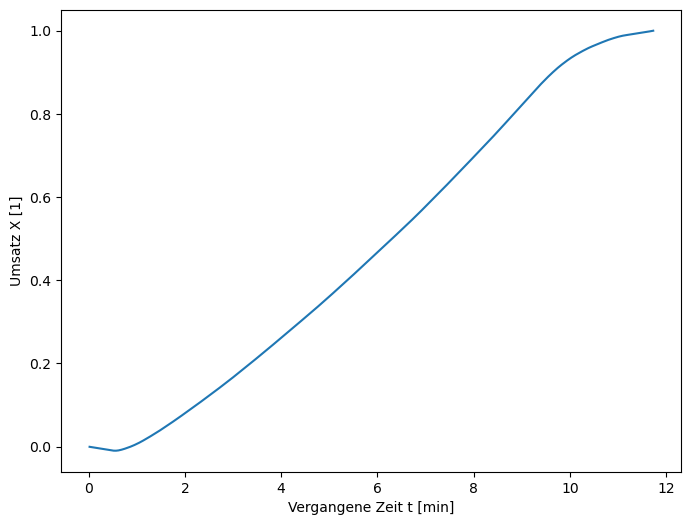

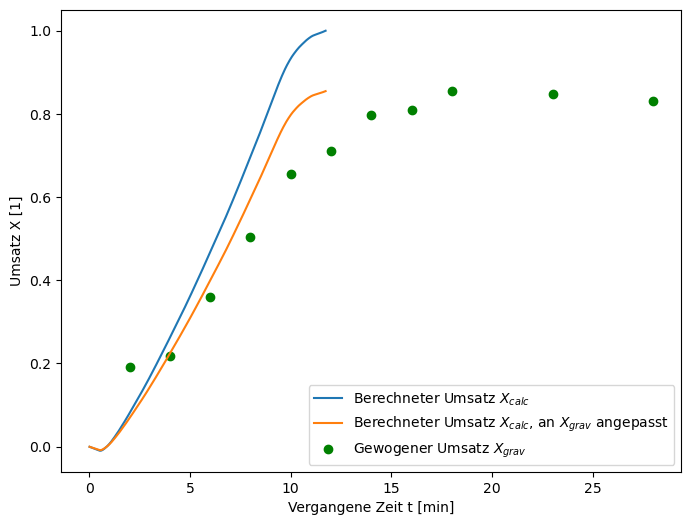

In [27]:
fig,ax = plt.subplots(figsize=(8,6  ))
index_max_T = T.argmax()
Q_max = Q_chem[0:index_max_T]
print(T.argmax(),index_max_T, len(t_min),T)
int_Q = scipy.integrate.cumulative_trapezoid(y=Q_max[0:index_max_T],x=t_min[0:index_max_T])

umsatz = int_Q/max(int_Q)
int_Q
ax.set_ylabel("Umsatz X [1]")
ax.set_xlabel("Vergangene Zeit t [min]")



ax.plot(t_min[1:index_max_T],umsatz,label="Berechneter Umsatz $X_{calc}$")
fig.savefig("ngrav.pdf")

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(t_min[1:index_max_T],umsatz,label="Berechneter Umsatz $X_{calc}$")
ax.plot(t_min[1:index_max_T],p[-3]*umsatz,label="Berechneter Umsatz $X_{calc}$, an $X_{grav}$ angepasst")



ax.scatter(t,p, label="Gewogener Umsatz $X_{grav}$",c="green")
ax.set_ylabel("Umsatz X [1]")
ax.set_xlabel("Vergangene Zeit t [min]")
ax.legend()
fig.savefig("QTP.pdf")

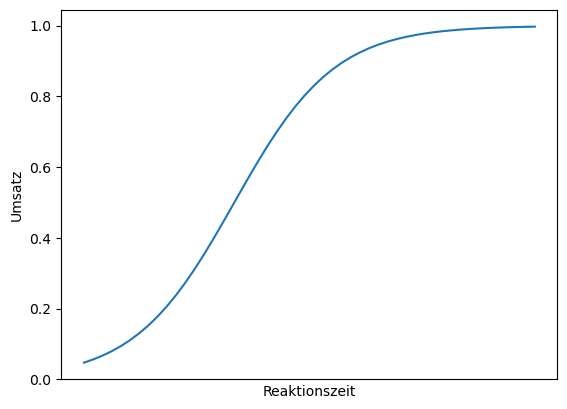

In [28]:
fig, ax = plt.subplots()
xs = np.linspace(0,18)
def logist(x):
    return( 1/(1+np.exp(-.5*(x-6)))) 
ax.plot(xs,logist(xs))
ax.xaxis.set_ticks([])
ax.set_xlabel("Reaktionszeit")
ax.set_ylabel("Umsatz")
fig.savefig("logistisch.pdf")